![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

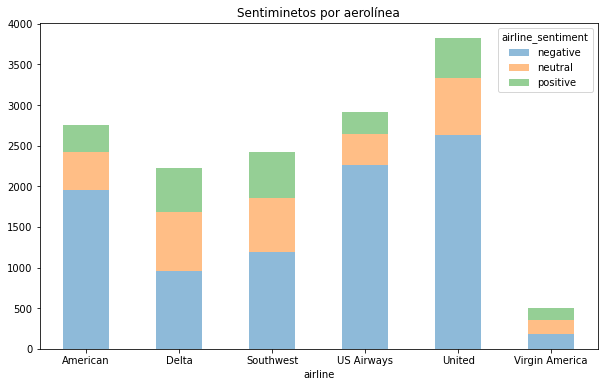

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
from sklearn.metrics import accuracy_score

# Preprocesamiento con CountVectorizer
vc = CountVectorizer()
X_train_vc = vc.fit_transform(X_train)
X_test_vc = vc.transform(X_test)

# Formulando modelo 
rf = RandomForestClassifier()
rf.fit(X_train_vc, y_train)

#Formulando predicciones
y_pred = rf.predict(X_test_vc)

#Evaluando desempeño 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7698675496688742


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2

# Removiendo stopwords 
vc2 = CountVectorizer(stop_words='english')

# Preprocesamiento con CountVectorizer
X_train_vc2 = vc2.fit_transform(X_train)
X_test_vc2 = vc2.transform(X_test)

# Formulando modelo 
rf = RandomForestClassifier()
rf.fit(X_train_vc2, y_train)

#Formulando predicciones
y_pred2 = rf.predict(X_test_vc2)

#Evaluando desempeño 
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.7642798013245033



### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 3
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


# Lematizando con verbos
wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    lemas = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    return lemas

# Preprocesamiento con CountVectorizer
vc3 = CountVectorizer(analyzer=split_into_lemmas)

X_train_vc3 = vc3.fit_transform(X_train)
X_test_vc3 = vc3.transform(X_test)

# Entrenando modelo
rf.fit(X_train_vc3, y_train)
#Formulando predicciones
y_pred3 = rf.predict(X_test_vc3)

#Evaluando desempeño 
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7624172185430463


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 4
import time
inicio = time.time()

# Removiendo stopwords y lematizando verbos
vc4 = CountVectorizer(stop_words='english',analyzer=split_into_lemmas)
# Preprocesamiento con CountVectorizer
X_train_vc4 = vc4.fit_transform(X_train)
X_test_vc4 = vc4.transform(X_test)

# Entrenando modelo
rf.fit(X_train_vc4, y_train)
#Formulando predicciones
y_pred4 = rf.predict(X_test_vc4)

#Evaluando desempeño 
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

fin= time.time()
print(fin-inicio)

Accuracy: 0.7582781456953642


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

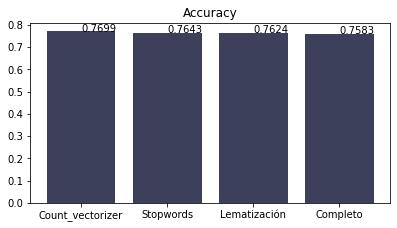

In [19]:
# Celda 5

# Accuracy
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['Count_vectorizer', 'Stopwords', 'Lematización', 'Completo']
ejeY = [round(accuracy, 4), round(accuracy2, 4), round(accuracy3, 4), round(accuracy4, 4)]
ax.bar(ejeX, ejeY, color = '#3d405b')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

**Conclusiones**

En el presente taller realizamos la predicción de los sentimientos hacia las aerolineas a partir de los textos de tweets. Los sentimientos se clasificaron como negativos, neutrales y positivos. Para este fin se emplearon modelos de randomforest. 

Se compararon diversas técnicas de procesamiento de lenguaje, comenzando con un countvectorizer sencillo. Luego se aplicaron otras técnicas como las stopwords, la lematización y una combinación de las anteriores. 

Los resultados del accuracy de los modelos se presentan en el gráfico anterior, en donde observamos una muy baja variación entre las distintas técnicas, resaltando que para este caso entre mayor procesamiento se le hacía a los datos, los modelos tienden a desmejorar. 

Es así como el countvectorizer sencillo en esta oportunidad obtiene un ligero puntaje de accuracy por encima que el resto de los modelos evaluados. 

Esto resulta contraintuitivo, sobre todo porque se entendería que al eliminar las stopwords o al realizar la lematización, el modelo predictivo del modelo debería  mejorar. 
Podría entenderse que la falta de mejora en los modelos puede ser debida, en el caso de las stopwords, porque los textos podrían tener una cantidad limitada de las mismas. 

En este caso, la ventaja del mejor modelo es que fue el más sencillo y es fácil de implementar. Adicionalmente toma poco tiempo de procesamiento. La desventaja del modelo completo es que es más demorado de ejecutar (y a pesar de esto no logra mejorar el desempeño del resultado).

De manera adicional realizamos las pruebas que se encuentran a continuación. Aunque se obtiene una leve mejora cuando se incluyen los n-gramas al modelo, en ninguno de los casos se alcanzó un modelo con mejor desempeño que el modelo de countvectorizer sencillo. 


In [23]:
# Celda 4

import time
inicio = time.time()
# Removiendo stopwords y lematizando verbos
vc4 = CountVectorizer(stop_words='english',analyzer=split_into_lemmas, ngram_range=(1, 3))
# Preprocesamiento con CountVectorizer
X_train_vc4 = vc4.fit_transform(X_train)
X_test_vc4 = vc4.transform(X_test)

# Entrenando modelo
rf.fit(X_train_vc4, y_train)
#Formulando predicciones
y_pred4 = rf.predict(X_test_vc4)

#Evaluando desempeño 
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

fin= time.time()
print(fin-inicio)

Accuracy: 0.7613824503311258
38.8197283744812


In [24]:
# Celda 4

import time
inicio = time.time()
# Removiendo stopwords y lematizando verbos
vc4 = CountVectorizer(stop_words='english', ngram_range=(1, 3))
# Preprocesamiento con CountVectorizer
X_train_vc4 = vc4.fit_transform(X_train)
X_test_vc4 = vc4.transform(X_test)

# Entrenando modelo
rf.fit(X_train_vc4, y_train)
#Formulando predicciones
y_pred4 = rf.predict(X_test_vc4)

#Evaluando desempeño 
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

fin= time.time()
print(fin-inicio)

Accuracy: 0.765728476821192
142.67322993278503


In [22]:
# Celda 4

# Removiendo stopwords y lematizando verbos
vc4 = CountVectorizer(ngram_range=(1, 3))
# Preprocesamiento con CountVectorizer
X_train_vc4 = vc4.fit_transform(X_train)
X_test_vc4 = vc4.transform(X_test)

# Entrenando modelo
rf.fit(X_train_vc4, y_train)
#Formulando predicciones
y_pred4 = rf.predict(X_test_vc4)

#Evaluando desempeño 
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.7588990066225165
